Name : W. K. D. D. Senuruk  
## Intensity Transformations

#### Carrying out Gamma correction on an image

Gamma correction can be used to correct the brightness of an image by using a non linear transformation between the input values and the mapped output values

$$
O = \left( \frac{I}{255} \right) ^\gamma \times 255
$$

Gamma correction Curve plot,

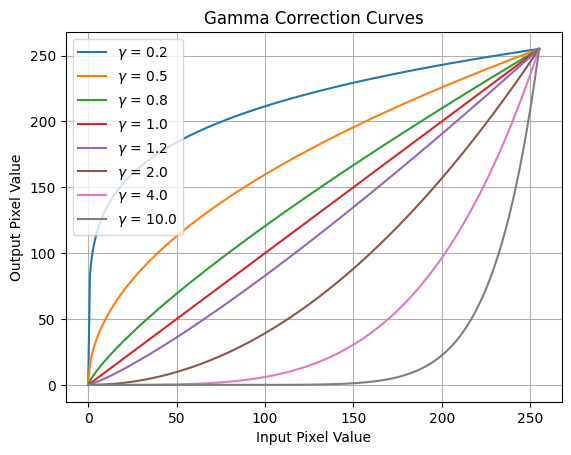

In [173]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

# gamma correction values
gamma_values = np.array([0.2, 0.5, 0.8, 1, 1.2, 2, 4, 10])

# creating the gamma correction curves
x = np.array([i for i in range(0, 256)])
for g in range(gamma_values.shape[0]):
    y = np.array([(j / 255) ** gamma_values[g] * 255 for j in x])
    plt.plot(x, y, label=f'$\\gamma$ = {gamma_values[g]}')

plt.title("Gamma Correction Curves")
plt.xlabel("Input Pixel Value")
plt.ylabel("Output Pixel Value")
plt.legend()
plt.grid(True)
plt.show()

For a color image, the correction needs to be done to all three channels

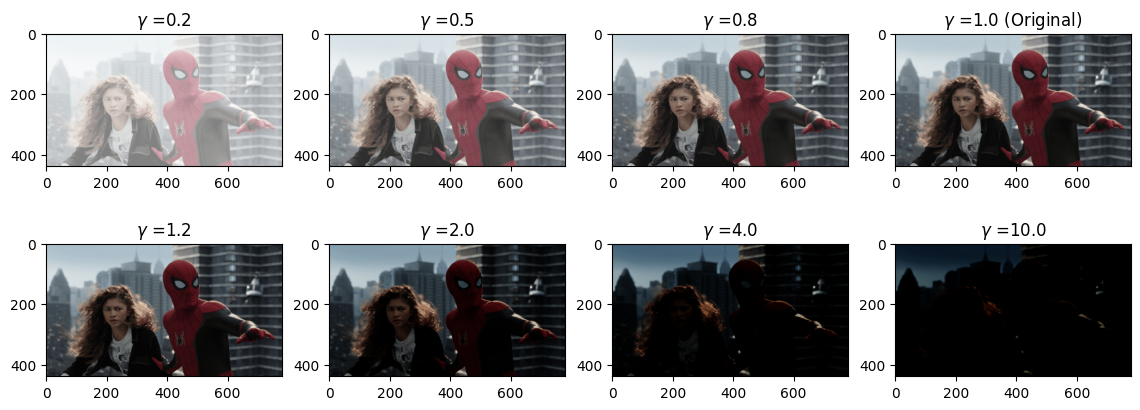

In [174]:
img = cv.imread(r'./Images/spider.png')

# Applying gamma corrections on the image with various gamma values
fig, ax = plt.subplots(2, 4, figsize=(14, 5))
for g in range(gamma_values.shape[0]):
    new_img = img.copy()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(img.shape[2]):
                new_img[i][j][k] = (img[i][j][k] / 255) ** gamma_values[g] * 255
    index1 = g // 4
    index2 = g % 4
    ax[index1][index2].imshow(cv.cvtColor(new_img, cv.COLOR_BGR2RGB))
    if (gamma_values[g] == 1):
        ax[index1][index2].set_title("$\\gamma$ =" + str(gamma_values[g]) + " (Original)")
    else:
        ax[index1][index2].set_title("$\\gamma$ =" + str(gamma_values[g]))
plt.show()

#### Intensity transformation by a custom curve

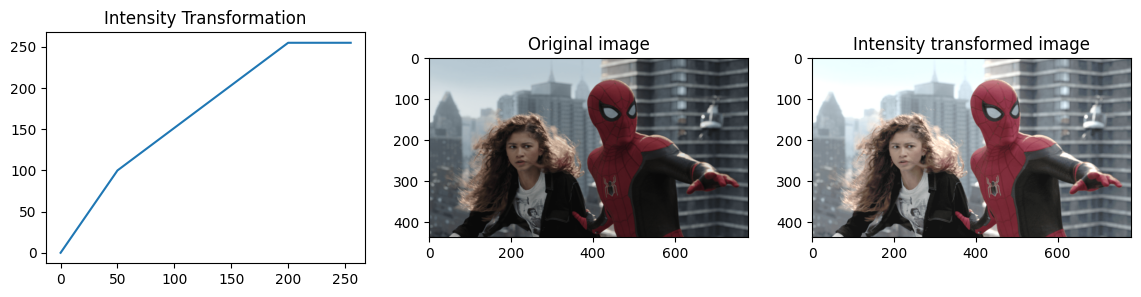

In [175]:
part1 = np.linspace(0, 100, 51)
part2 = np.linspace(100, 255, 151)[1:]
part3 = np.array([255 for i in range(55)])
y = np.concatenate((part1, part2, part3))
x = np.linspace(0, 255, 256).astype(int)

# transforming the intensity of the image
new_img = img.copy()
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        for k in range(img.shape[2]):
            new_img[i][j][k] = y[img[i][j][k]]

fig, ax = plt.subplots(1, 3, figsize=(14, 3))
ax[0].plot(x, y)
ax[0].set_title("Intensity Transformation")
ax[1].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[1].set_title("Original image")
ax[2].imshow(cv.cvtColor(new_img, cv.COLOR_BGR2RGB))
ax[2].set_title("Intensity transformed image")
plt.show()

#### Histogram Equalization

Histogram equalization enhances contrast by redistributing the intensity values of an image

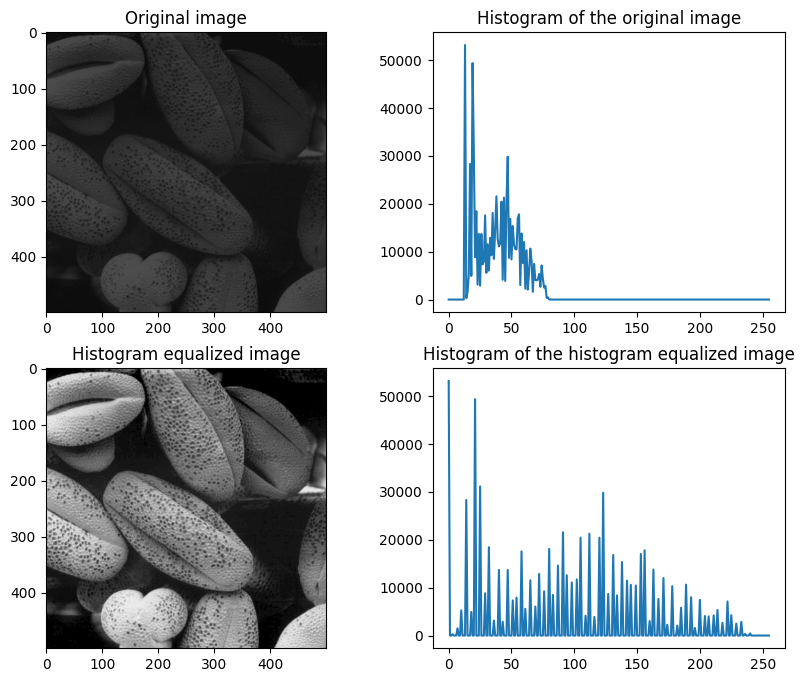

In [176]:
img = cv.imread(r'./Images/shells.tif')

# getting the histogram of the image
x = np.array([k for k in range(256)])
val_list = []
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        val_list.append(img[i][j])
hist = np.histogram(val_list, bins=256, range=(-0.5, 255.5))

# finding minimum non zero pixel value of the histogram
for i in range(hist[0].shape[0]):
    if (hist[0][i] != 0):
        min_val = i
        break

# finding maximum non zero pixel value of the histogram
hist_reverse = np.flip(hist[0])
for i in range(hist[0].shape[0]):
    if (hist_reverse[i] != 0):
        max_val = 255 - i
        break

# creating the histogram equalized image
new_img = img.copy()
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        new_img[i][j] = ((img[i][j] - min_val)/(max_val - min_val)) * 255

# getting the histogram of the histogram equalized image
new_val_list = []
for i in range(new_img.shape[0]):
    for j in range(new_img.shape[1]):
        new_val_list.append(new_img[i][j])
new_hist = np.histogram(new_val_list, bins=256, range=(-0.5, 255.5))

fig, ax = plt.subplots(2, 2, figsize=(10, 8))
ax[0][0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0][0].set_title("Original image")
ax[0][1].plot(x, hist[0])
ax[0][1].set_title("Histogram of the original image")
ax[1][0].imshow(cv.cvtColor(new_img, cv.COLOR_BGR2RGB))
ax[1][0].set_title("Histogram equalized image")
ax[1][1].plot(x, new_hist[0])
ax[1][1].set_title("Histogram of the histogram equalized image")
plt.show()

#### Enhancing saturation and changing hue values

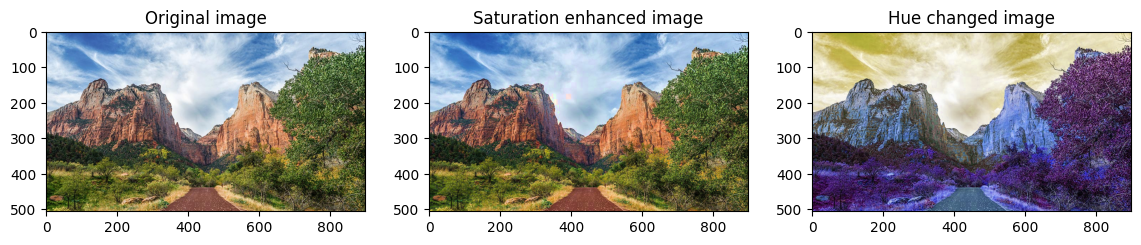

In [178]:
import warnings
warnings.filterwarnings("ignore")

img = cv.imread(r'./Images/Zion_pass.jpg')
hsv_img_s = cv.cvtColor(img, cv.COLOR_BGR2HSV)
hsv_img_h = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# enhancing saturation by a value of 25
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        val_s = hsv_img_h[i, j][1]
        if ((val_s + 25) >= 255):
            hsv_img_s[i, j][1] = 255
        else:
            hsv_img_s[i, j][1] += 25

# changing hue by a value of 100
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        val_h = hsv_img_h[i, j][0]
        if ((val_h + 100) >= 255):
            hsv_img_h[i, j][0] = 255
        else:
            hsv_img_h[i, j][0] += 100

fig, ax = plt.subplots(1, 3, figsize=(14, 3))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title("Original image")
ax[1].imshow(cv.cvtColor(hsv_img_s, cv.COLOR_HSV2RGB))
ax[1].set_title("Saturation enhanced image")
ax[2].imshow(cv.cvtColor(hsv_img_h, cv.COLOR_HSV2RGB))
ax[2].set_title("Hue changed image")
plt.show()